In [1]:
#importing libraries
import math
import random
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
random.seed(1)

global one_words

#defining function get_ngrams
def get_ngrams(n, text):
    letters = text.split()
    for j in range(n - 1):
        letters = ['<s>'] + letters
    letters += ['</s>']
    for j in range(len(letters)-(n - 1)):
        wd = letters[j + n-1]
        ctx = tuple(letters[j:j + n-1])
        yield (wd, ctx)
    return





#Class NgramLM 
class NGramLM:
    def __init__(self, n):
        self.n = n
        self.count_ngram = dict()
        self.count_ctx = dict()
        self.vocab = dict()
        self.vocabulary_sort = OrderedDict()
        self.words_unique = set()



#defining function update
   
   
   
   
    def update(self, text):
        # This function will change the internal counters of the class or modelta.
        res = get_ngrams(self.n, text)
        word_no = len(text.split())
        # The number of SGML tags is shown below the letter 'n'.
        for _ in range(word_no):
            try:
                gen = next(res)
                word = gen[0]
                contextttt = gen[1]
                if word not in self.vocab:
                    self.vocab[word] = 1
                    self.words_unique.add(word)
                else:
                    self.vocab[word] += 1
                    if word in self.words_unique:
                        self.words_unique.remove(word)
                if contextttt not in self.count_ngram:
                    self.count_ngram[(word, contextttt)] = 1
                else:
                    self.count_ngram[(word, contextttt)] += 1
                if contextttt not in self.count_ctx:
                    self.count_ctx[contextttt] = 1
                else:
                    self.count_ctx[contextttt] += 1
            except StopIteration:
                break




#defining function word_prob
   
   
   
   
   
    def word_prob(self, word, contextttt, delta=0):
        # As a float, this function returns the likelihood of ngram(word, contextttt) occurring in the given contextttt.
        n_gram = (word, contextttt)
        if contextttt not in self.count_ctx:
            problem = 1 / len(self.vocab)
            return problem
        if n_gram not in self.count_ngram:
            if '<unk>' in self.vocab:
                problem = (self.vocab['<unk>'] + delta)/(self.count_ctx[n_gram[1]] +  delta * len(self.vocab))
            else:
                problem = delta / (self.count_ctx[n_gram[1]] +  delta * len(self.vocab))
            return problem

        problem = ((self.count_ngram[n_gram] + delta) / ((self.count_ctx[n_gram[1]]) +  delta * len(self.vocab)))
        return problem





#defining function random_word
    def random_word(self, contextttt, delta=0):
        # Creating a new ordered vocabulary is an important step.
        key_sorted = sorted(self.vocab.keys())
        for key in key_sorted:
            self.vocabulary_sort[key] = self.vocab[key]

        r = random.random()

        total_problem = 0
        word_prob= []
        for word in key_sorted:
            total_problem += self.word_prob(word, contextttt, delta)
            word_prob.append((word, total_problem))
        sorted_word_prob = sorted(word_prob, key=lambda x: x[1])

        for k in range(0, len(sorted_word_prob)):
            if sorted_word_prob[k][1] > r:
                break
  
        return sorted_word_prob[k - 1][0]

#defining function likeliest_word
    
    
    
    def likeliest_word(self, contextttt, delta=0):
        total_problem = 0
        maximum_prob = -1
        likely_words = ''
        for word in self.vocab:
            problem = self.word_prob(word, contextttt, delta)
            total_problem = total_problem + problem
            if problem >= maximum_prob:
                maximum_prob = problem
                likely_words = word
        return likely_words





#defining function create_ngramlm



def create_ngramlm(n, path_corpus):
    # This function will pass the tokenized data to the appropriate update function.
    mymodeltaaaaa = NGramLM(n)
    data = open(path_corpus, 'r')
    data_contents = data.read()
    data_sentences = data_contents.splitlines()
    for s in data_sentences:
        mymodeltaaaaa.update(s)
    return mymodeltaaaaa



#defining function text_prob
def text_prob(modelta, text):
           
           
            # The number of SGML tags is shown below the letter 'n'.
    


    res = get_ngrams(modelta.n, text)
    txt_prob = 1
    word_no = len(text.split())
    try:
      for _ in range(word_no):
          gen = next(res)
          word = gen[0]
          contextttt = gen[1]
          txt_prob += math.log(modelta.word_prob(word, contextttt))
      return txt_prob
    except:
        return 0




#defining function perplexity
def perplexity(modelta, path_corpus):
    with open(path_corpus, 'r') as doc:
        tokens_init = 0
        for line in doc:
            words = line.split()
            tokens_init += len(words)
        logperplexity = 0.0
    with open(path_corpus, 'r') as doc:
        for line in doc:
            logperplexity += text_prob(modelta, line)
        logperplexity /= tokens_init
        return math.e ** (-1 * logperplexity)




#defining function random_text
def random_text(modelta, max_length, delta=0):
    nxt_word = ''
    s = ''
    contextttt = ()
    for k in range(modelta.n-1):
        w = "<s>"
        contextttt = contextttt+(w,)
    while max_length > 0 and nxt_word != '</s>':
        nxt_word = modelta.random_word(contextttt,0)
        new_context = ()
        for k in range(len(contextttt)-1):
            new_context = new_context+(contextttt[k+1],)
        new_context = new_context+(nxt_word,)
        contextttt = new_context;
        max_length = max_length-1
        s = s+nxt_word+' '
    return s


In [3]:
def laplaces():
  import argparse
  from itertools import product
  import math
  import nltk
  from pathlib import Path



  SOS = "<s> "
  EOS = "</s>"
  UNK = "<UNK>"

#def fun adding_sentence_tokens
  def adding_sentence_tokens(sentences, n):
      sos = SOS * (n-1) if n > 1 else SOS
      return ['{}{} {}'.format(sos, s, EOS) for s in sentences]

#def fun replacing singletons
  def replacing_singletons(tokens):
      vocab = nltk.FreqDist(tokens)
      return [token if vocab[token] > 1 else UNK for token in tokens]

#def fun preprocessing
  def preprocessing(sentences, n):
      
      sentences = adding_sentence_tokens(sentences, n)
      tokens = ' '.join(sentences).split(' ')
      tokens = replacing_singletons(tokens)
      return tokens

#Class Language Model
  class Language_Model(object):
      
      #def fun
      def __init__(self, train_data, n, laplaces):
          self.n = n
          self.laplaces = laplaces
          self.tokens = preprocessing(train_data, n)
          self.vocab  = nltk.FreqDist(self.tokens)
          self.model  = self._create_model()
          self.mask  = list(reversed(list(product((0,1), repeat=n))))

#def fun
      def _smooth(self):
          
          vocab_size = len(self.vocab)

          n_grams = nltk.ngrams(self.tokens, self.n)
          n_vocab = nltk.FreqDist(n_grams)

          m_grams = nltk.ngrams(self.tokens, self.n-1)
          m_vocab = nltk.FreqDist(m_grams)

#def fun
          def smooth_count(n_gram, n_count):
              m_gram = n_gram[:-1]
              m_count = m_vocab[m_gram]
              return (n_count + self.laplaces) / (m_count + self.laplaces * vocab_size)

          return { n_gram: smooth_count(n_gram, count) for n_gram, count in n_vocab.items() }

#def fun
      def _create_model(self):
          
          if self.n == 1:
              num_token = len(self.tokens)
              return { (unigram,): count / num_token for unigram, count in self.vocab.items() }
          else:
              return self._smooth()

#def fun
      def _convert_oov(self, ngram):
          
          mask = lambda ngram, bitmask: tuple((token if flag == 1 else "<UNK>" for token,flag in zip(ngram, bitmask)))

          ngram = (ngram,) if type(ngram) is str else ngram
          for possibilly_known in [mask(ngram, bitmask) for bitmask in self.mask]:
              if possibilly_known in self.model:
                  return possibilly_known

#def fun
      def perplexity(self, test_data):
          
          test_tokens = preprocessing(test_data, self.n)
          test_ngrams = nltk.ngrams(test_tokens, self.n)
          N = len(test_tokens)

          ngrams_known  = (self._convert_oov(ngram) for ngram in test_ngrams)
          probabilities = [self.model[ngram] for ngram in ngrams_known]

          return math.exp((-1/N) * sum(map(math.log, probabilities)))

      def _best_candidate(self, prev, n, without=[]):
          
          blacklist  = ["<UNK>"] + without
          candidates_bl = ((ngram[-1],prob) for ngram,prob in self.model.items() if ngram[:-1]==prev)
          candidates_bl = filter(lambda candidate: candidate[0] not in blacklist, candidates_bl)
          candidates_bl = sorted(candidates_bl, key=lambda candidate: candidate[1], reverse=True)
          if len(candidates_bl) == 0:
              return ("</s>", 1)
          else:
              return candidates_bl[0 if prev != () and prev[-1] != "<s>" else n]
      
      def generate_sentences(self, num, min_len=12, max_len=24):
          for n in range(num):
              sent, prob = ["<s>"] * max(1, self.n-1), 1
              while sent[-1] != "</s>":
                  prev = () if self.n == 1 else tuple(sent[-(self.n-1):])
                  blacklist = sent + (["</s>"] if len(sent) < min_len else [])
                  nxt_token, next_prob = self._best_candidate(prev, n, without=blacklist)
                  sent.append(nxt_token)
                  prob *= next_prob
                  
                  if len(sent) >= max_len:
                      sent.append("</s>")

              yield ' '.join(sent), -1/math.log(prob)
        

  if __name__ == '__main__':
      
      with open('ted.txt', 'r') as f:
          train_1 = [l.strip() for l in f.readlines()]
      with open('reddit.txt', 'r') as f:
          train_2 = [l.strip() for l in f.readlines()]
      
      with open('test.reddit.txt', 'r') as f:
          test_1 = [l.strip() for l in f.readlines()]
      with open('test.ted.txt', 'r') as f:
          test_2 = [l.strip() for l in f.readlines()]
      with open('test.news.txt', 'r') as f:
          test_3 = [l.strip() for l in f.readlines()]
      
      lm = Language_Model(train_1, 2, laplaces=0)



      perplexity = lm.perplexity(test_1)
      lm_perplxty = []
      lm_perplxty.append(perplexity)
      perplexity = lm.perplexity(test_2)
      lm_perplxty.append(perplexity)
      perplexity = lm.perplexity(test_3)
      lm_perplxty.append(perplexity)



      for n in range(3,7):
        lm = Language_Model(train_1, n, laplaces=1)
        perplexity = lm.perplexity(test_1)
        lm_perplxty.append(perplexity)
        perplexity = lm.perplexity(test_2)
        lm_perplxty.append(perplexity)
        perplexity = lm.perplexity(test_3)
        lm_perplxty.append(perplexity)
      
     
      
      lm2 = Language_Model(train_2, 2, laplaces=1)
      lm2_per = []
      perplexity = lm2.perplexity(test_1)
      lm2_per.append(perplexity)
      perplexity = lm2.perplexity(test_2)
      lm2_per.append(perplexity)
      perplexity = lm2.perplexity(test_3)
      lm2_per.append(perplexity)

      for n in range(3,7):
        lm2 = Language_Model(train_2, n, laplaces=1)
        perplexity = lm2.perplexity(test_1)
        lm2_per.append(perplexity)
        perplexity = lm2.perplexity(test_2)
        lm2_per.append(perplexity)
        perplexity = lm2.perplexity(test_3)
        lm2_per.append(perplexity)
      x_axis_n = [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
      plt.scatter(x_axis_n, lm_perplxty, label = "n_gram on ted.txt", color= "pink",marker= "*", s=30)
      plt.scatter(x_axis_n, lm2_per, label = "n_gram on ted.txt", color= "black",marker= "*", s=30)
      plt.xlabel('n grams')
      plt.ylabel('Perplexity  ')
      plt.title('N gram models with laplaces smoothing')
      plt.legend()
      plt.show()
    

1 Gram Model
The perplexity of 'test.reddit.txt' is 657.6490657504273
The perplexity of 'test.ted.txt' is 311561.3375464345
The perplexity of 'test.news.txt' is 695.9088749377563
____________________________________________________________________________________________
1 Gram Model on the ted.txt
The perplexity of 'test.reddit.txt' is 657.6490657504273
The perplexity of 'test.ted.txt' is 311561.3375464345
The perplexity of 'test.news.txt' is 695.9088749377563
_______________________________________________________________________________________________________
2 n-gram models on ted.txt and the reddit.txt where n = (1,7))


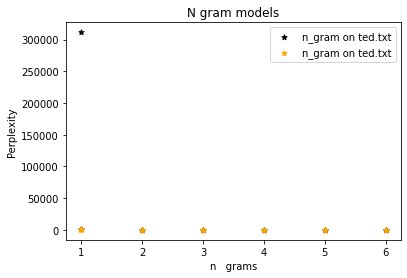

[657.6490657504273, 311561.3375464345, 695.9088749377563, 1.3181086332214196, 4.634933846854814, 1.1682502624515831, 1.0154674612072494, 1.285128437367693, 1.0108539930807265, 1.0, 1.0757642116859665, 1.0, 1.0, 1.0360629233725966, 1.0, 1.0, 1.0297022477627245, 1.0]
[734.3745746922241, 904.1719397210783, 18.007118886471954, 1.1689966105398046, 1.4620601099602362, 1.0110890057521102, 1.0019627186525157, 1.0304525145504915, 1.0010227997882737, 1.0012792063256564, 1.0113278345849654, 1.0, 1.0, 1.0088762607527348, 1.0, 1.0, 1.0068765020171313, 1.0]
_________________________________________________________________________________________________________
2 n-gram models with laplace smoothing on ted.txt and reddit.txt where n = (2,7))


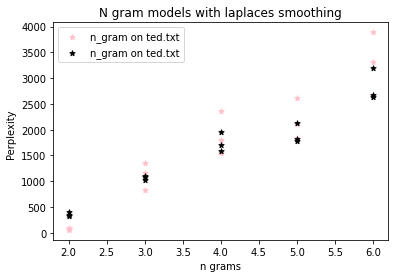

_________________________________________________________________________________________________________
Generate two 500 words text files and calculate there perplexities
The perplexity of 'reddit.out.txt' is 1.0
The perplexity of 'ted.out.txt' is 1.0


In [4]:
# Part 1
print("1 Gram Model")
model1 = create_ngramlm(1, 'ted.txt')

print('The perplexity of \'test.reddit.txt\' is {}'.format(perplexity(model1, 'test.reddit.txt')))
print('The perplexity of \'test.ted.txt\' is {}'.format(perplexity(model1, 'test.ted.txt')))
print('The perplexity of \'test.news.txt\' is {}'.format(perplexity(model1, 'test.news.txt')))

print("____________________________________________________________________________________________")

# Part 2
print("1 Gram Model on the ted.txt")
model2 = create_ngramlm(1, 'ted.txt')

print('The perplexity of \'test.reddit.txt\' is {}'.format(perplexity(model2, 'test.reddit.txt')))
print('The perplexity of \'test.ted.txt\' is {}'.format(perplexity(model2, 'test.ted.txt')))
print('The perplexity of \'test.news.txt\' is {}'.format(perplexity(model2, 'test.news.txt')))

print("_______________________________________________________________________________________________________")

# Part 3
print("2 n-gram models on ted.txt and the reddit.txt where n = (1,7))")
model_3 = create_ngramlm(1, 'ted.txt')
model_4 = create_ngramlm(1, 'reddit.txt')

model3_per = []
model4_per = []
x = perplexity(model_3, 'test.reddit.txt')
y = perplexity(model_3, 'test.ted.txt')
z = perplexity(model_3, 'test.news.txt')
model3_per.append(x)
model3_per.append(y)
model3_per.append(z)
x = perplexity(model_4, 'test.reddit.txt')
y = perplexity(model_4, 'test.ted.txt')
z = perplexity(model_4, 'test.news.txt')
model4_per.append(x)
model4_per.append(y)
model4_per.append(z)
for i in range(2,7):
  model_3 = create_ngramlm(i, 'ted.txt')
  x = perplexity(model_3, 'test.reddit.txt')
  y = perplexity(model_3, 'test.ted.txt')
  z = perplexity(model_3, 'test.news.txt')
  model3_per.append(x)
  model3_per.append(y)
  model3_per.append(z)

  model_4 = create_ngramlm(i, 'reddit.txt')
  x = perplexity(model_4, 'test.reddit.txt')
  y = perplexity(model_4, 'test.ted.txt')
  z = perplexity(model_4, 'test.news.txt')
  model4_per.append(x)
  model4_per.append(y)
  model4_per.append(z)
x_axis_n = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
plt.scatter(x_axis_n, model3_per, label = "n_gram on ted.txt", color= "black",marker= "*", s=30)
plt.scatter(x_axis_n, model4_per, label = "n_gram on ted.txt", color= "orange",marker= "*", s=30)
plt.xlabel('n   grams')
plt.ylabel('Perplexity')
plt.title('N gram models')
plt.legend()
plt.show()
print(model3_per)
print(model4_per)
print("_________________________________________________________________________________________________________")

# Part.   4
print("2 n-gram models with laplace smoothing on ted.txt and reddit.txt where n = (2,7))")
laplaces()
print("_________________________________________________________________________________________________________")
# Part.   5
print("Generate two 500 words text files and calculate there perplexities")

reddit = create_ngramlm(4, 'ted.txt')
ted = create_ngramlm(6, 'reddit.txt')

re = random_text(reddit, 500)
file1 = open("reddit.out.txt","w")
file1.write(re)
file1.close() 

te = random_text(ted, 500)
file1 = open("ted.out.txt","w")
file1.write(te)
file1.close() 

print('The perplexity of \'reddit.out.txt\' is {}'.format(perplexity(reddit, 'reddit.out.txt')))
print('The perplexity of \'ted.out.txt\' is {}'.format(perplexity(ted, 'ted.out.txt')))